### EDA for `users.csv`

Performing exploratory data analysis for `users.csv` to gain insights about the consumers for these advertising campaigns. 

In [ ]:
# load necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
# load users.csv 
path = os.getcwd()
users = pd.read_csv(path + "/data/users.csv")

# display first few rows to confirm data loaded properly
users.head()

,user_id,user_gender,user_age,age_group,country,location,interests
0,a2474,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,141e5,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,34db0,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,20d08,Female,28,25-34,India,Lisaport,"health, news, finance"
4,9e830,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"


In [ ]:
# search for missing values in users
print(f"Number of missing values in users\n{users.isna().sum()}\n")

# drop any duplicate rows 
users = users.drop_duplicates()

Number of rows in users: 10000
Number of missing values in users
user_id        0
user_gender    0
user_age       0
age_group      0
country        0
location       0
interests      0
dtype: int64


In [7]:
# now without missing values and duplicate rows, get info for users and describe the columns
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      10000 non-null  object
 1   user_gender  10000 non-null  object
 2   user_age     10000 non-null  int64 
 3   age_group    10000 non-null  object
 4   country      10000 non-null  object
 5   location     10000 non-null  object
 6   interests    10000 non-null  object
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [8]:
# see if there's repeated user ids
temp = pd.DataFrame(users['user_id'].value_counts() > 1)
repeat_users = list(temp[temp['count'] == True].index)

# investigate repeats
repeats = users[users['user_id'].isin(repeat_users)]
repeats.sort_values(by = 'user_id').head(6)

,user_id,user_gender,user_age,age_group,country,location,interests
5384,02ad5,Female,21,18-24,Brazil,New Adam,"technology, gaming, sports"
7258,02ad5,Female,38,35-44,Canada,North Stacy,"art, lifestyle, food"
9850,0b8c2,Male,27,25-34,United States,Harrisland,"technology, sports"
6045,0b8c2,Male,27,25-34,Canada,West Caroline,"art, technology"
2570,0ebd6,Male,32,25-34,Canada,Port Melissaport,sports
1029,0ebd6,Male,28,25-34,United States,South Jason,health


For the sake of performing EDA combined with the fact we already filtered `users` for duplicate rows (for which there were none), we can remove the user_id column and replace it with an index value unqiue to each user. When it comes to analyzing ad events, we will address the handling of ad events involving one of these repeated user_ids.

In [9]:
# drop user_id column from users
users = users.drop(columns = ['user_id']).reset_index(drop = True)

# show updated users table
users.head()

,user_gender,user_age,age_group,country,location,interests
0,Female,24,18-24,United Kingdom,New Mariomouth,"fitness, health"
1,Male,21,18-24,Germany,Danielsfort,"food, fitness, lifestyle"
2,Male,27,25-34,Australia,Vincentchester,"fashion, news"
3,Female,28,25-34,India,Lisaport,"health, news, finance"
4,Male,28,25-34,United States,Brownmouth,"health, photography, lifestyle"


In [15]:
# first calculating important metrics for combined visualization
total_users = len(users)
min_age, max_age = users['user_age'].min(), users['user_age'].max()
total_countries = len(users['country'].value_counts())
total_locations = len(users['location'].value_counts())

gender_counts = users['user_gender'].value_counts()
age_group_counts = users['age_group'].value_counts()
country_counts = users['country'].value_counts().to_frame()

# feature engineering for interests 
# create list of interests for each entry
users['interests_list'] = users['interests'].str.split(r',\s*')

# blow up list into multiple rows, one for each interest in the list
users_exploded = users.explode('interests_list')

# tally interests
interests_counts = users_exploded['interests_list'].value_counts().to_frame()

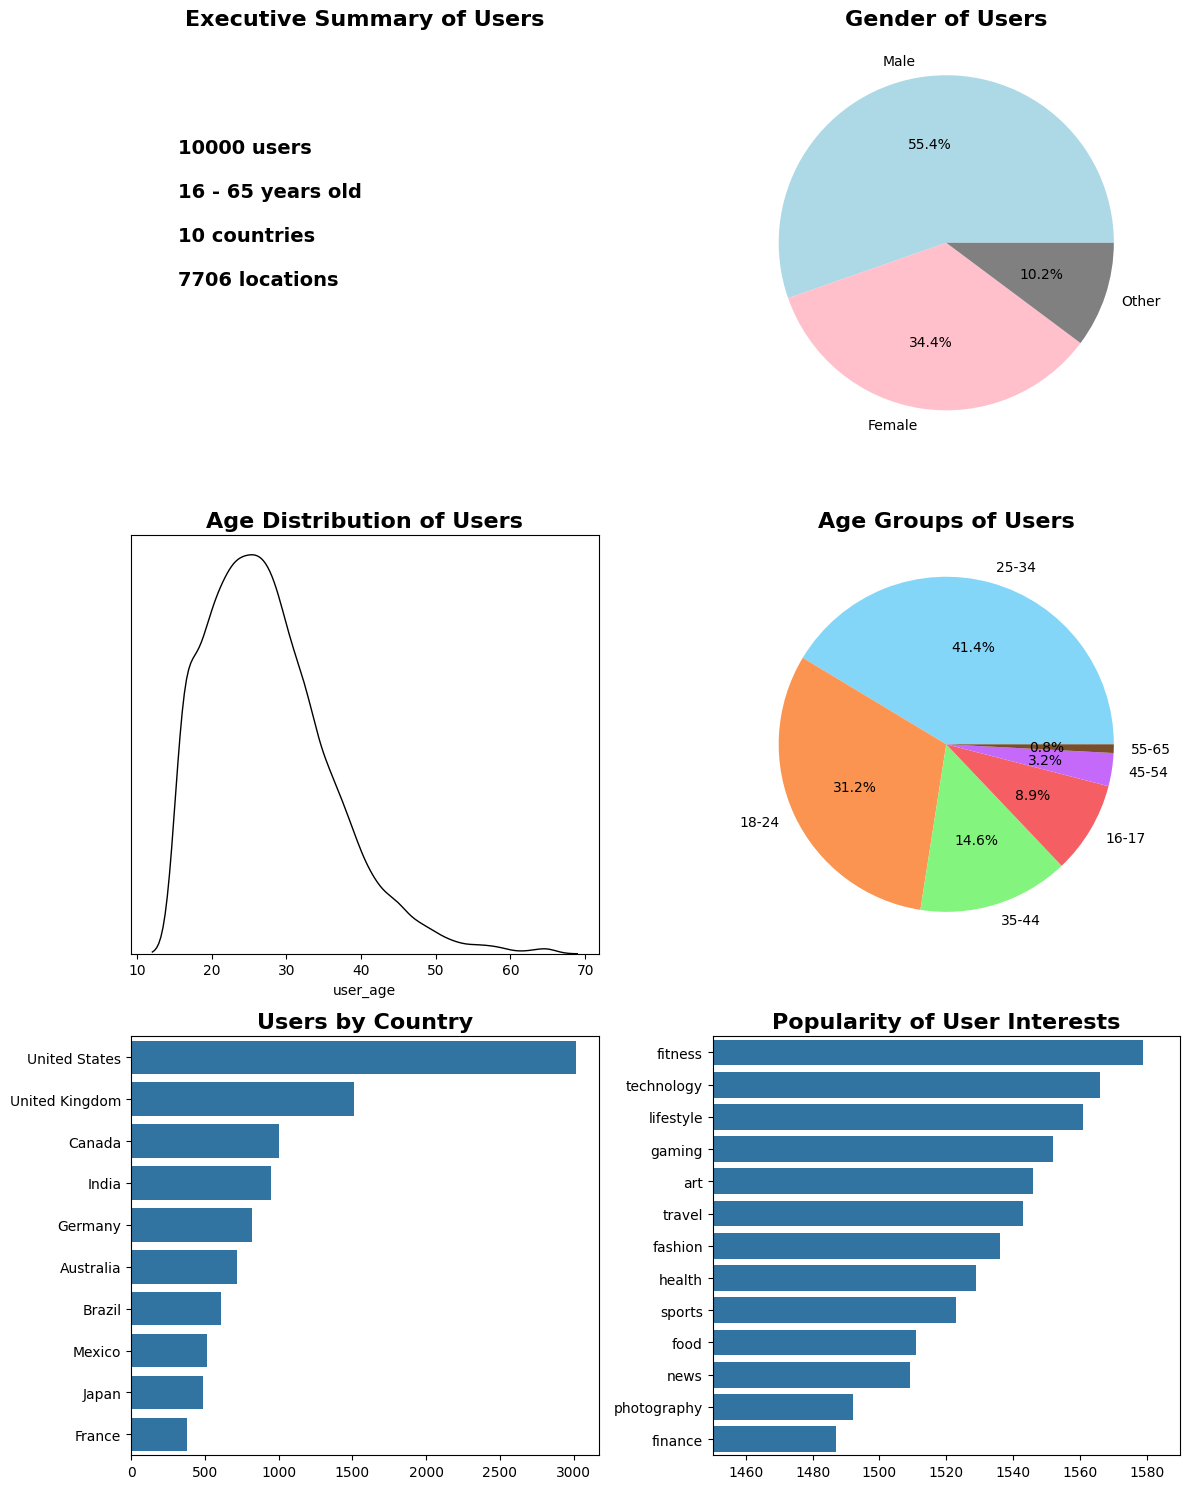

In [21]:
# combined visualization of EDA
fig = plt.figure(figsize = (12, 15))

# Executive Summary
plt.subplot(3, 2, 1)
plt.text(0.1, 0.4, f'{total_users} users\n\n{min_age} - {max_age} years old\n\n{total_countries} countries\n\n{total_locations} locations',
         fontsize = 14, fontweight = 'bold')
plt.title('Executive Summary of Users', fontsize = 16, fontweight = 'bold')
plt.axis('off')

# Gender Pie Chart
plt.subplot(3, 2, 2)
plt.pie(gender_counts.values, labels = gender_counts.index, autopct = '%1.1f%%', colors = ['lightblue', 'pink', 'grey'])
plt.title("Gender of Users", fontsize = 16, fontweight = 'bold')

# Age Distribution
plt.subplot(3, 2, 3)
sns.kdeplot(data = users, x = 'user_age', color = 'black', linewidth = 1)
plt.gca().axes.get_yaxis().set_visible(False)
plt.title("Age Distribution of Users", fontsize = 16, fontweight = 'bold')

# Age Group Pie Chart
plt.subplot(3, 2, 4)
plt.pie(age_group_counts.values, labels = age_group_counts.index, autopct = '%1.1f%%',
        colors = ['#83d6f7', '#fa9450', '#83f57f', '#f55f64', '#c569fa', '#784e2b'])
plt.title("Age Groups of Users", fontsize = 16, fontweight = 'bold')

# Country Distribution
plt.subplot(3, 2, 5)
sns.barplot(data = country_counts, x = 'count', y = 'country')
plt.xlabel('')
plt.ylabel('')
plt.title('Users by Country', fontsize = 16, fontweight = 'bold')

# Interests Distribution
plt.subplot(3, 2, 6)
sns.barplot(data = interests_counts, x = 'count', y = 'interests_list')
plt.xlim(left = 1450, right = 1590)
plt.ylabel('')
plt.xlabel('')
plt.title('Popularity of User Interests', fontsize = 16, fontweight = 'bold')

# show plots 
plt.tight_layout()
plt.show()